### This is a an active notebook as such the structure and content will likely change, 

#### intended use is to use this to create plots and some light analysis of between different tractography runs - I intened to streamline it so for each plot on a subject by subject basis to either have just one cell as a template or a loop to create a file to be examined for each subject 

when it is more clear what will be useful visualisations and necessary for analysis this may morph in to a more structured permanant notebook 

as usual the first cell imports packages and sets various variables and subject lists/dicts, I then load the necessary graph and comp dicts, 

In [18]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pickle

# set variables that will point to dictionary keys - with the type/output will be in the dict, note these 
# are not based on the output of the analagous networkx function but how I have written into dict


#data/matrices
graph = "graph" #networkx graph basically dictionaries all the way down
data = "data" #pandas data frame 
bin_mat = "binary_matrix" #numpy array 
bin_df = "binary_df"
data_numpy = "data_as_numpy_array" #numpy array
norm_lap = "normalised_laplacian" #numpy array?

#global metrics 
gl_eff = "global_efficiency" #float
loc_eff = "local_efficiency" #float
clus_coef = "clusetering_coefficent" #float
ave_path_length = "ave_path_length" #float
clique_num = "clique_number" #int (poss float but always integer valued)
ass_coef = "assortativity_coefficient" #float
transitivity = "transitivity" #float
rich_club_coeff = "rich_club_coefficient" #currently not working would be float
sw_sigma = "" #currently not working would be float
sw_gamma = "" #currently not working would be float
ave_strength = "average_node_strength" #float
no_edges = "number_of_edges" #int
ave_deg = "average_degree" #int

#individual node/edge metrics and dicts
deg = "degree" #dictionary - nodes as key degree as values 
bet_cent = "betweenness_centrality" # dictionary - nodes as key betweeness as values 
edge_bet_cent = "edge_betweenness_centrality" # dictionary - edge tuple as key edgebetweeness centrality as values 
eigen_cent = "eigenvector_centrality" # dictionary - nodes as eigenvalue centrality as values 
deg_cent = "degree_centrality" # dictionary - nodes as key degree centrality as values 
strength = "node_strength"  # dictionary - nodes as key strength as values 

#other
deg_hist = "degree_histogram" #list - index is degree value is how many nodes with that degree 
norm_lap_spec = "normalised_laplacian_spectrum" #list of floats?


#subject dictionary with a list of runs - corresponds to how connectome file is saved for now hand written 
sub_dict = {"NENAH004" : ["orig", "run2"], "NENAH010" :  ["orig", "run2"], "NENAH011" :  ["orig", "run2"],
                "NENAH012" : ["orig", "run2"], "NENAH015" : ["orig", "run2"], "NENAH016" : ["orig", "run2"], 
                "NENAH022" : ["orig", "run2"], "NENAH024" : ["orig", "run2"], "NENAHC002" : ["orig", "run2", "run3"], 
                "NENAHC003" : ["orig", "run2","run3"], "NENAHC010" : ["orig", "run2", "run3"],
                "NENAHC013" : ["orig", "run2", "run3"], "NENAHC016" : ["orig", "run2", "run3"],
                "NENAHC018" : ["orig", "run2", "run3"], "NENAHC020": ["orig", "run2", "run3"],
                "NENAHC025" : ["orig", "run2"]
           }

case_dict = {"NENAH004" : ["orig", "run2"], "NENAH010" :  ["orig", "run2"], "NENAH011" :  ["orig", "run2"],
                "NENAH012" : ["orig", "run2"], "NENAH015" : ["orig", "run2"], "NENAH016" : ["orig", "run2"], 
                "NENAH022" : ["orig", "run2"], "NENAH024" : ["orig", "run2"]
            }

control_dict = { "NENAHC002" : ["orig", "run2", "run3"],  "NENAHC003" : ["orig", "run2", "run3"], 
                "NENAHC010" : ["orig", "run2", "run3"],"NENAHC013" : ["orig", "run2", "run3"],
                "NENAHC016" : ["orig", "run2", "run3"], "NENAHC018" : ["orig", "run2", "run3"],
                "NENAHC020": ["orig", "run2", "run3"], "NENAHC025" : ["orig", "run2",]
             }

#create the lists which might be usuefull in automating data frame creation
#note these should be strings
global_metrics = [gl_eff, loc_eff, clus_coef, ave_path_length, clique_num,
                  transitivity, ave_strength, no_edges, ave_deg] 

node_metrics = [deg, strength, bet_cent, eigen_cent, deg_cent]

other_metrics = [deg_hist, norm_lap_spec, edge_bet_cent,]

thresholds = [0.05, 0.02, 0.01, 0.005, 0.001, 0.0005, 0.0001]


In [19]:
# load in the main graph dictionary and they created comparison dictionary with various thresholds

with open('graph_dict.pickle', 'rb') as handle:
     graph_dict = pickle.load(handle)
        
with open('comp_dict.pickle', 'rb') as handle:
    comp_dict = pickle.load(handle)

In [ ]:
# check loaded correctly with expected dict structure

print(list(comp_dict['NENAHC025'].keys())[0:35])
print(graph_dict["NENAH004orig"].keys())

In [21]:
# load in and filter where needed various previously created dataframes 
global_metrics = pd.read_csv('global_metrics.csv', index_col = 0 )
global_metrics.drop(columns = ['clique_number', "average_degree"],axis = 1,  inplace=True)
global_metrics.drop(index=["NENAHC002run3",  "NENAHC003run3", "NENAHC010run3", "NENAHC013run3", "NENAHC016run3", "NENAHC018run3",
           "NENAHC020run3"], axis =0, inplace=True)

global_metrics_orig = global_metrics.filter(like ="orig", axis =0)
global_pct_change = pd.read_csv('global_pct_change.csv', index_col = 0)
# global_pct_change.head(17)
strength_orig = pd.read_csv('node_strength.csv', index_col = 0).filter(like ="orig", axis =0)
strength_abs_change = pd.read_csv('strength_abs_change.csv', index_col = 0)
strength_pct_change = pd.read_csv('strength_pct_change.csv', index_col = 0)

# strength_orig.head(18)
# strength_abs_change.head(18)
# strength_pct_change.head(18)

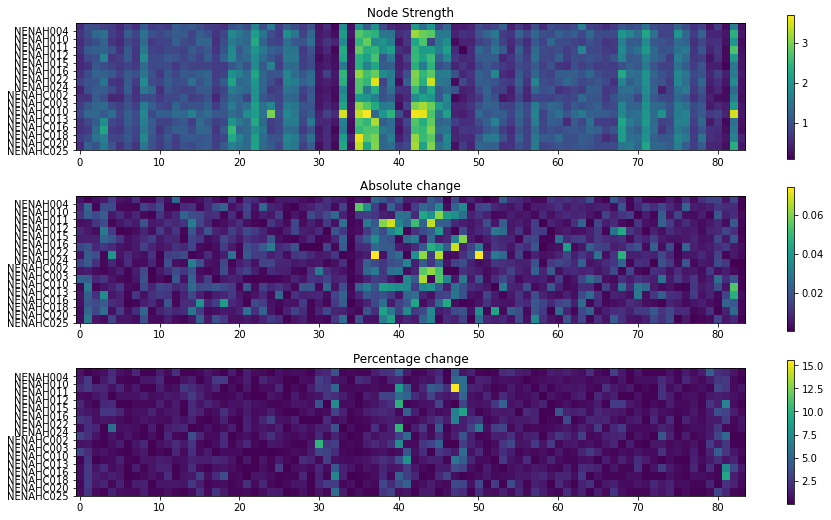

In [18]:
x = plt.figure(figsize=(15,9))
plt.title('Node Strength')
# x.tight_layout(pad=0)


plt.subplot(311)
plt.title('Node Strength')
plt.imshow(strength_orig)
# plt.imshow(str_df_orig, vmin=0, vmax=3, cmap='viridis', aspect='auto')
plt.yticks(np.arange(0.5, 16, 1), strength_abs_change.index)
plt.colorbar()

plt.subplot(312)
plt.title("Absolute change")
plt.imshow(strength_abs_change)
# plt.imshow(strength_abs_change, vmin=0, vmax=0.15, cmap='viridis', aspect='auto')
plt.yticks(np.arange(0.5, 16, 1), strength_abs_change.index)
plt.colorbar()

plt.subplot(313)
plt.title('Percentage change')
plt.imshow(strength_pct_change)
plt.yticks(np.arange(0.5, 16, 1), strength_abs_change.index)
plt.colorbar()


plt.show()

In [17]:
global_metrics.head()


,global_efficiency,local_efficiency,clusetering_coefficent,ave_path_length,transitivity,average_node_strength,number_of_edges
sub-id,,,,,,,
NENAH004orig,0.793412,0.876942,0.753892,1.413368,0.713124,0.905938,2046
NENAH004run2,0.794607,0.878639,0.757279,1.410786,0.715011,0.907146,2054
NENAH010orig,0.859725,0.907628,0.815256,1.280551,0.792585,1.221500,2508
NENAH010run2,0.858147,0.905623,0.811247,1.283706,0.789491,1.220287,2497
NENAH011orig,0.786957,0.877841,0.755688,1.426277,0.705985,1.073708,2001


In [18]:
global_metrics.describe()

,global_efficiency,local_efficiency,clusetering_coefficent,ave_path_length,transitivity,average_node_strength,number_of_edges
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.830725,0.893225,0.786451,1.338569,0.756398,1.152690,2305.843750
std,0.020644,0.010000,0.019998,0.041313,0.026004,0.129558,143.886853
min,0.786957,0.876942,0.753892,1.280551,0.705985,0.905938,2001.000000
25%,0.819062,0.884188,0.768376,1.306727,0.740177,1.067691,2224.500000
50%,0.832544,0.894042,0.788085,1.334911,0.757284,1.188502,2318.500000
75%,0.846637,0.899012,0.798024,1.361876,0.773771,1.226517,2416.750000
max,0.859725,0.911751,0.823503,1.426277,0.797820,1.420423,2508.000000


In [19]:
global_pct_change.head()

,global_efficiency,local_efficiency,clusetering_coefficent,ave_path_length,transitivity,average_node_strength,number_of_edges
NENAH004,0.150648,0.193502,0.449229,0.182667,0.264725,0.133338,0.391007
NENAH010,0.183517,0.220869,0.491789,0.246416,0.390329,0.099237,0.438596
NENAH011,0.461725,0.202728,0.470673,0.522928,0.869199,0.041475,1.249375
NENAH012,0.429434,0.376859,0.857029,0.509122,0.912764,0.002195,1.107174
NENAH015,0.444977,0.079020,0.178938,0.563380,0.386584,0.095496,1.103097


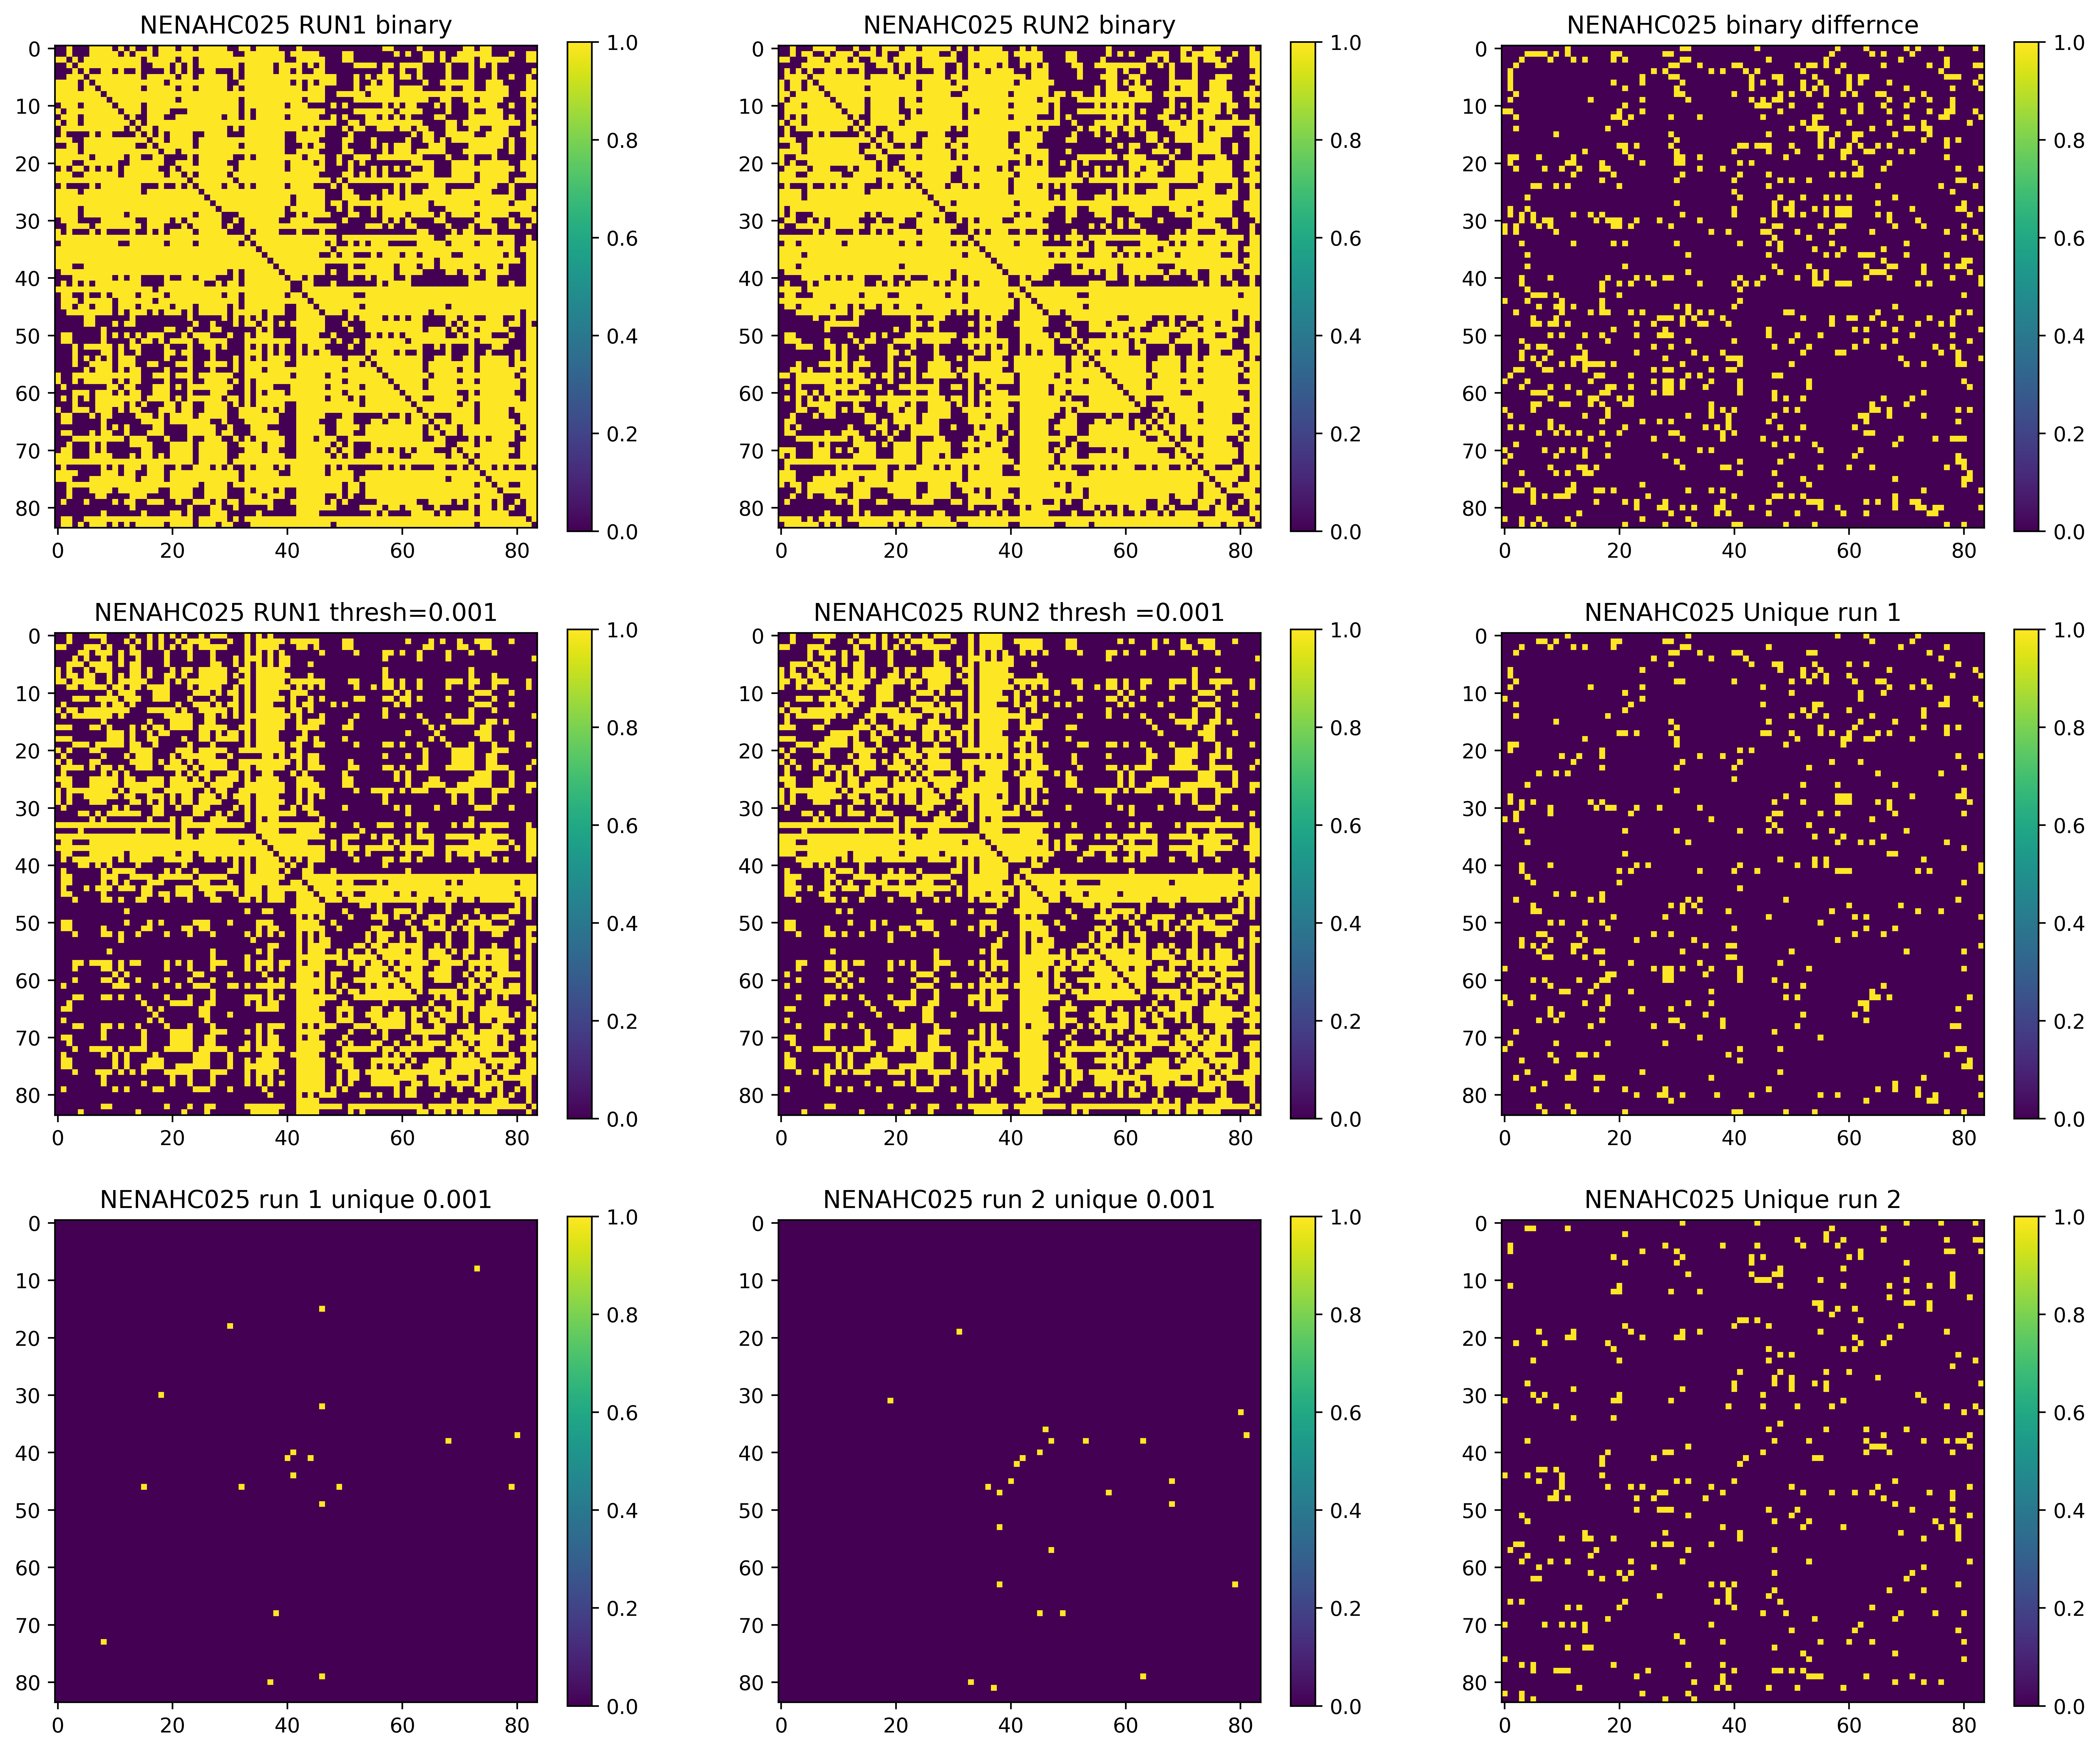

In [22]:
plt.figure(figsize=(18,15), dpi= 500)

plt.subplot(331)
plt.title("NENAHC025 RUN1 binary")
plt.imshow(graph_dict['NENAHC025orig']["binary_df_0"])
plt.colorbar()
# plt.yticks(np.arange(0.5, 84, 1), df.index)
# plt.xticks(np.arange(0.5, 84, 1), df.columns)

plt.subplot(332)
plt.title("NENAHC025 RUN2 binary")
plt.imshow(graph_dict['NENAHC025run2']["binary_df_0"])
plt.colorbar()
# plt.yticks(np.arange(0.5, 84, 1), df.index)
# plt.xticks(np.arange(0.5, 84, 1), df.columns)


plt.subplot(333)
plt.title("NENAHC025 binary differnce")
plt.imshow(comp_dict['NENAHC025']['bin_diff'])
plt.colorbar()

plt.subplot(334)
plt.title("NENAHC025 RUN1 thresh=0.001")
plt.imshow(graph_dict['NENAHC025orig']["binary_df_0.001"] )
plt.colorbar()
# plt.yticks(np.arange(0.5, 84, 1), df.index)
# plt.xticks(np.arange(0.5, 84, 1), df.columns)

plt.subplot(335)
plt.title("NENAHC025 RUN2 thresh =0.001")
plt.imshow(graph_dict['NENAHC025run2']["binary_df_0.001"])
plt.colorbar()
# plt.yticks(np.arange(0.5, 84, 1), df.index)
# plt.xticks(np.arange(0.5, 84, 1), df.columns)


plt.subplot(336)
plt.title("NENAHC025 Unique run 1" )
plt.imshow(comp_dict['NENAHC025']['res_orig_bin_df'])
plt.colorbar()

plt.subplot(337)
plt.title("NENAHC025 run 1 unique 0.001")
plt.imshow(comp_dict['NENAHC025']['unique_orig_0.001_bin'])
plt.colorbar()
# plt.yticks(np.arange(0.5, 84, 1), df.index)
# plt.xticks(np.arange(0.5, 84, 1), df.columns)

plt.subplot(338)
plt.title("NENAHC025 run 2 unique 0.001")
plt.imshow(comp_dict['NENAHC025']['unique_run2_0.001_bin'])
plt.colorbar()
# plt.yticks(np.arange(0.5, 84, 1), df.index)
# plt.xticks(np.arange(0.5, 84, 1), df.columns)


plt.subplot(339)
plt.title("NENAHC025 Unique run 2" )
plt.imshow(comp_dict['NENAHC025']['res_run2_bin_df'])
plt.colorbar()

plt.show()

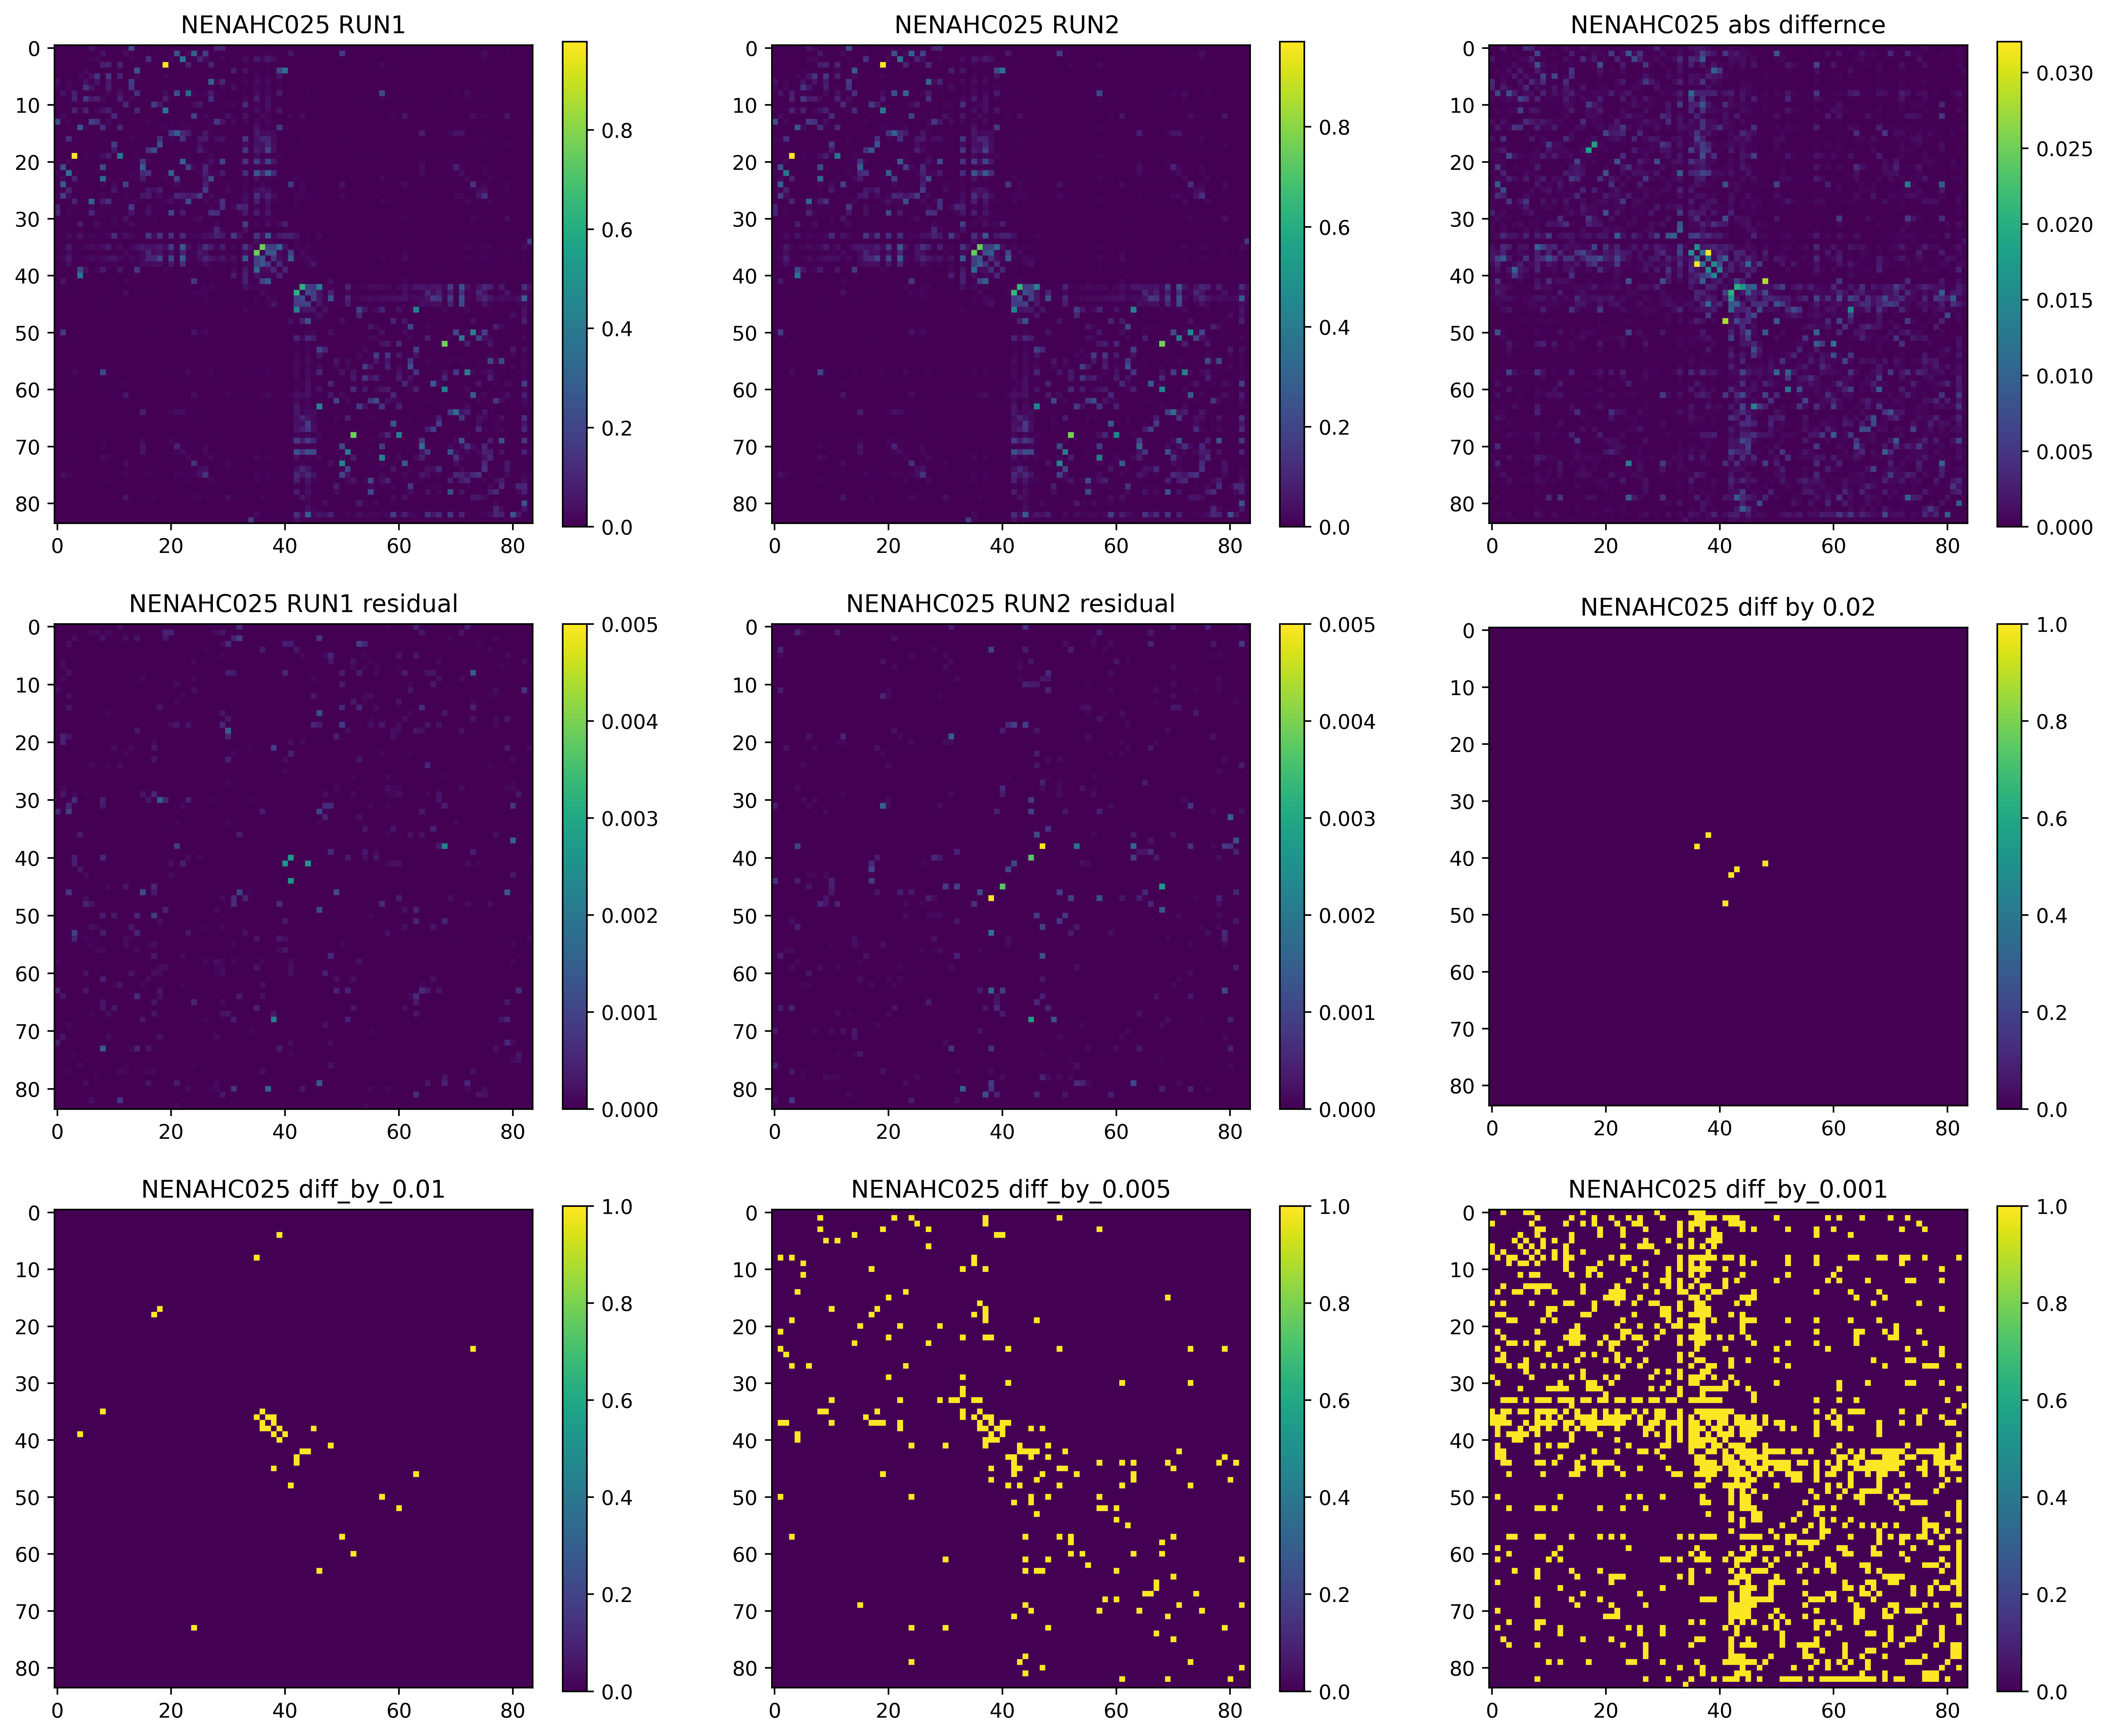

In [8]:
plt.figure(figsize=(18,15), dpi= 500)

plt.subplot(331)
plt.title("NENAHC025 RUN1")
plt.imshow(graph_dict['NENAHC025orig']["data"])
plt.colorbar()
# plt.yticks(np.arange(0.5, 84, 1), df.index)
# plt.xticks(np.arange(0.5, 84, 1), df.columns)

plt.subplot(332)
plt.title("NENAHC025 RUN2 ")
plt.imshow(graph_dict['NENAHC025run2']["data"])
plt.colorbar()
# plt.yticks(np.arange(0.5, 84, 1), df.index)
# plt.xticks(np.arange(0.5, 84, 1), df.columns)


plt.subplot(333)
plt.title("NENAHC025 abs differnce")
plt.imshow(abs(graph_dict['NENAHC025orig']["data"]- graph_dict['NENAHC025run2']["data"]))
plt.colorbar()

plt.subplot(334)
plt.title("NENAHC025 RUN1 residual")
plt.imshow(comp_dict['NENAHC025']["res_orig_df"], vmin=0, vmax=0.005, aspect='auto' )
plt.colorbar()
# plt.yticks(np.arange(0.5, 84, 1), df.index)
# plt.xticks(np.arange(0.5, 84, 1), df.columns)

plt.subplot(335)
plt.title("NENAHC025 RUN2 residual")
plt.imshow(comp_dict['NENAHC025']["res_run2_df"], vmin=0, vmax=0.005, aspect='auto')
plt.colorbar()
# # plt.yticks(np.arange(0.5, 84, 1), df.index)
# # plt.xticks(np.arange(0.5, 84, 1), df.columns)


plt.subplot(336)
plt.title("NENAHC025 diff by 0.02" )
plt.imshow(comp_dict['NENAHC025']["diff_by_0.02"])
plt.colorbar()

plt.subplot(337)
plt.title("NENAHC025 diff_by_0.01")
plt.imshow(comp_dict['NENAHC025']['diff_by_0.01'])
plt.colorbar()
# plt.yticks(np.arange(0.5, 84, 1), df.index)
# plt.xticks(np.arange(0.5, 84, 1), df.columns)

plt.subplot(338)
plt.title("NENAHC025 diff_by_0.005")
plt.imshow(comp_dict['NENAHC025']['diff_by_0.005'])
plt.colorbar()
# plt.yticks(np.arange(0.5, 84, 1), df.index)
# plt.xticks(np.arange(0.5, 84, 1), df.columns)


plt.subplot(339)
plt.title("NENAHC025 diff_by_0.001" )
plt.imshow(comp_dict['NENAHC025']['diff_by_0.001'])
plt.colorbar()

plt.show()

In [6]:
print(list(comp_dict['NENAHC025'].keys())[0:35])
thresholds = [0.05, 0.02, 0.01, 0.005, 0.001, 0.0005, 0.0001]

['orig_data', 'run2_data', 'bin_diff', 'edges_different', 'orig_edges', 'run2_edges', 'average_edges', 'percentage_edge_diff', 'res_orig_df', 'res_orig_bin_df', 'res_run2_df', 'res_run2_bin_df', 'orig_unique_edges', 'run2_unique_edges', 'orig_unique_edges_pct', 'run2_unique_edges_pct', 'orig_unique_node_strength', 'orig_unique_node_strength_pct', 'run2_unique_node_strength', 'run2_unique_node_strength_pct', 'orig_unique_tot_strength', 'orig_unique_tot_strength_pct', 'run2_unique_tot_strength', 'run2_unique_tot_strength_pct', 'unique_orig_0.05_bin', 'unique_orig_0.05', 'unique_run2_0.05_bin', 'unique_run2_0.05', 'no_edges_unique_orig_0.05', 'no_edges_unique_run2_0.05', 'percentage_unique_orig_0.05', 'percentage_unique_run2_0.05', 'diff_by_0.05', 'unique_orig_0.02_bin', 'unique_orig_0.02']


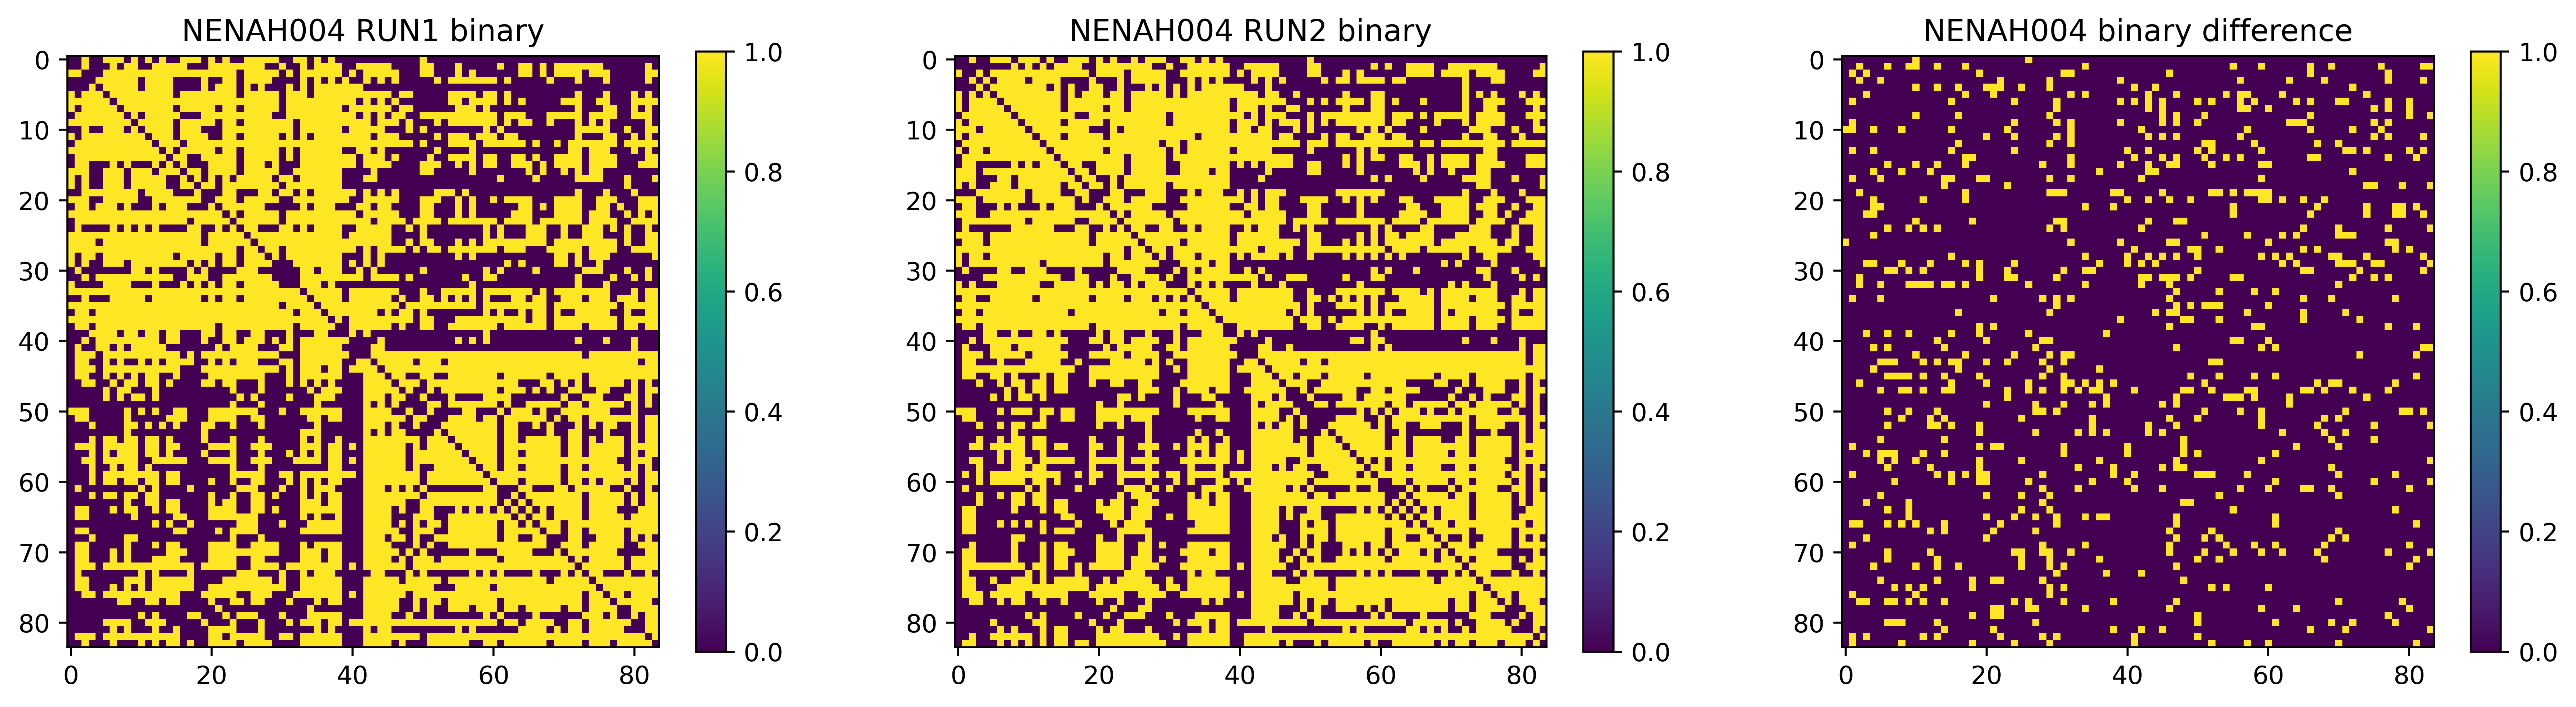

In [21]:
plt.figure(figsize=(18,15), dpi= 500)

plt.subplot(331)
plt.title("NENAH004 RUN1 binary")
plt.imshow(graph_dict['NENAH004orig']["binary_df_0"])
plt.colorbar()
# plt.yticks(np.arange(0.5, 84, 1), df.index)
# plt.xticks(np.arange(0.5, 84, 1), df.columns)

plt.subplot(332)
plt.title("NENAH004 RUN2 binary")
plt.imshow(graph_dict['NENAH004run2']["binary_df_0"])
plt.colorbar()
# plt.yticks(np.arange(0.5, 84, 1), df.index)
# plt.xticks(np.arange(0.5, 84, 1), df.columns)


plt.subplot(333)
plt.title("NENAH004 binary difference")
plt.imshow(comp_dict['NENAH004']['bin_diff'])
plt.colorbar()

# plt.subplot(334)
# plt.title("NENAH004 RUN1 thresh=0.001")
# plt.imshow(graph_dict['NENAH004orig']["binary_df_0.001"] )
# plt.colorbar()
# # plt.yticks(np.arange(0.5, 84, 1), df.index)
# # plt.xticks(np.arange(0.5, 84, 1), df.columns)

# plt.subplot(335)
# plt.title("NENAH004 RUN2 thresh =0.001")
# plt.imshow(graph_dict['NENAH004run2']["binary_df_0.001"])
# plt.colorbar()
# # plt.yticks(np.arange(0.5, 84, 1), df.index)
# # plt.xticks(np.arange(0.5, 84, 1), df.columns)


# plt.subplot(336)
# plt.title("NENAH004 Unique run 1" )
# plt.imshow(comp_dict['NENAH004']['res_orig_bin_df'])
# plt.colorbar()

# plt.subplot(337)
# plt.title("NENAH004 run 1 unique 0.001")
# plt.imshow(comp_dict['NENAH004']['unique_orig_0.001_bin'])
# plt.colorbar()
# # plt.yticks(np.arange(0.5, 84, 1), df.index)
# # plt.xticks(np.arange(0.5, 84, 1), df.columns)

# plt.subplot(338)
# plt.title("NENAH004 run 2 unique 0.001")
# plt.imshow(comp_dict['NENAH004']['unique_run2_0.001_bin'])
# plt.colorbar()
# # plt.yticks(np.arange(0.5, 84, 1), df.index)
# # plt.xticks(np.arange(0.5, 84, 1), df.columns)


# plt.subplot(339)
# plt.title("NENAH004 Unique run 2" )
# plt.imshow(comp_dict['NENAH004']['res_run2_bin_df'])
# plt.colorbar()

plt.show()

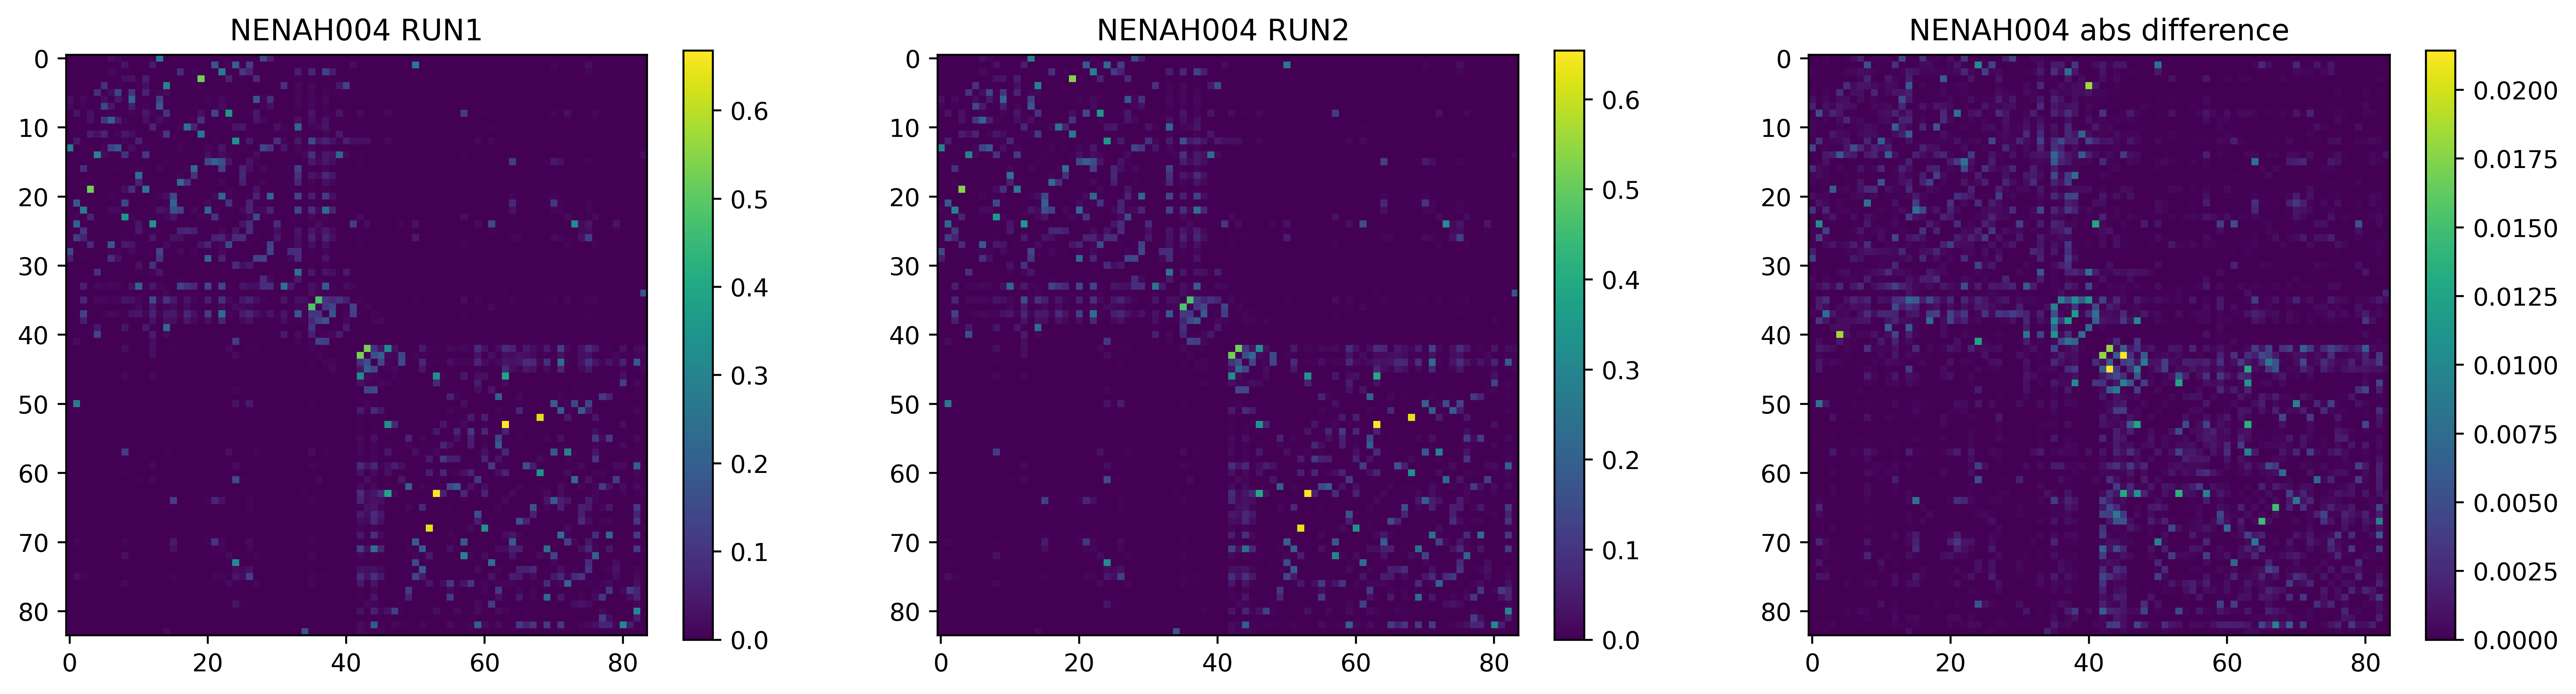

In [22]:
plt.figure(figsize=(18,15), dpi= 500)

plt.subplot(331)
plt.title("NENAH004 RUN1")
plt.imshow(graph_dict['NENAH004orig']["data"])
plt.colorbar()
# plt.yticks(np.arange(0.5, 84, 1), df.index)
# plt.xticks(np.arange(0.5, 84, 1), df.columns)

plt.subplot(332)
plt.title("NENAH004 RUN2 ")
plt.imshow(graph_dict['NENAH004run2']["data"])
plt.colorbar()
# plt.yticks(np.arange(0.5, 84, 1), df.index)
# plt.xticks(np.arange(0.5, 84, 1), df.columns)


plt.subplot(333)
plt.title("NENAH004 abs difference")
plt.imshow(abs(graph_dict['NENAH004orig']["data"]- graph_dict['NENAH004run2']["data"]))
plt.colorbar()

# plt.subplot(334)
# plt.title("NENAH004 RUN1 residual")
# plt.imshow(comp_dict['NENAH004']["res_orig_df"], vmin=0, vmax=0.005, aspect='auto' )
# plt.colorbar()
# # plt.yticks(np.arange(0.5, 84, 1), df.index)
# # plt.xticks(np.arange(0.5, 84, 1), df.columns)

# plt.subplot(335)
# plt.title("NENAH004 RUN2 residual")
# plt.imshow(comp_dict['NENAH004']["res_run2_df"], vmin=0, vmax=0.005, aspect='auto')
# plt.colorbar()
# # # plt.yticks(np.arange(0.5, 84, 1), df.index)
# # # plt.xticks(np.arange(0.5, 84, 1), df.columns)


# plt.subplot(336)
# plt.title("NENAH004 diff by 0.02" )
# plt.imshow(comp_dict['NENAH004']["diff_by_0.02"])
# plt.colorbar()

# plt.subplot(337)
# plt.title("NENAH004 diff_by_0.01")
# plt.imshow(comp_dict['NENAH004']['diff_by_0.01'])
# plt.colorbar()
# # plt.yticks(np.arange(0.5, 84, 1), df.index)
# # plt.xticks(np.arange(0.5, 84, 1), df.columns)

# plt.subplot(338)
# plt.title("NENAH004 diff_by_0.005")
# plt.imshow(comp_dict['NENAH004']['diff_by_0.005'])
# plt.colorbar()
# # plt.yticks(np.arange(0.5, 84, 1), df.index)
# # plt.xticks(np.arange(0.5, 84, 1), df.columns)


# plt.subplot(339)
# plt.title("NENAH004 diff_by_0.001" )
# plt.imshow(comp_dict['NENAH004']['diff_by_0.001'])
# plt.colorbar()

plt.show()

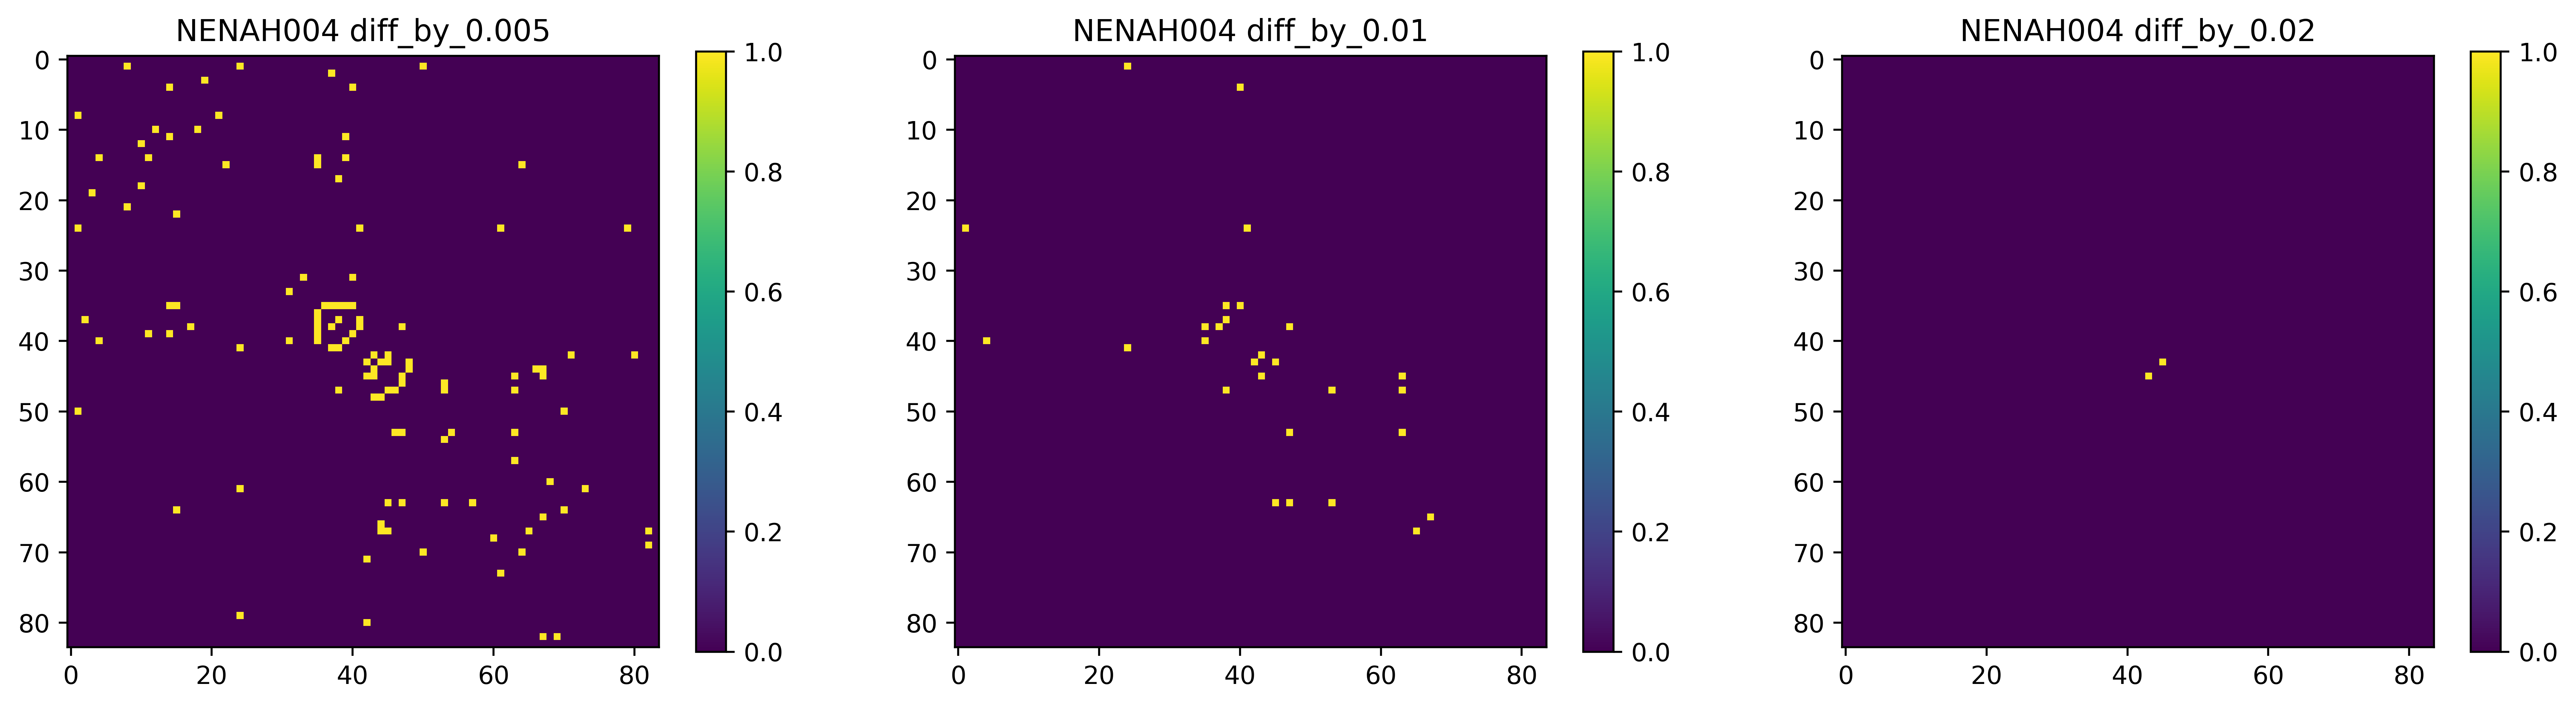

In [27]:
plt.figure(figsize=(18,15), dpi= 500)

plt.subplot(331)
plt.title("NENAH004 diff_by_0.005")
plt.imshow(comp_dict['NENAH004']['diff_by_0.005'])
plt.colorbar()
# plt.yticks(np.arange(0.5, 84, 1), df.index)
# plt.xticks(np.arange(0.5, 84, 1), df.columns)

plt.subplot(332)
plt.title("NENAH004 diff_by_0.01")
plt.imshow(comp_dict['NENAH004']['diff_by_0.01'])
plt.colorbar()
# plt.yticks(np.arange(0.5, 84, 1), df.index)
# plt.xticks(np.arange(0.5, 84, 1), df.columns)


plt.subplot(333)
plt.title("NENAH004 diff_by_0.02" )
plt.imshow(comp_dict['NENAH004']['diff_by_0.02'])
plt.colorbar()

plt.show()

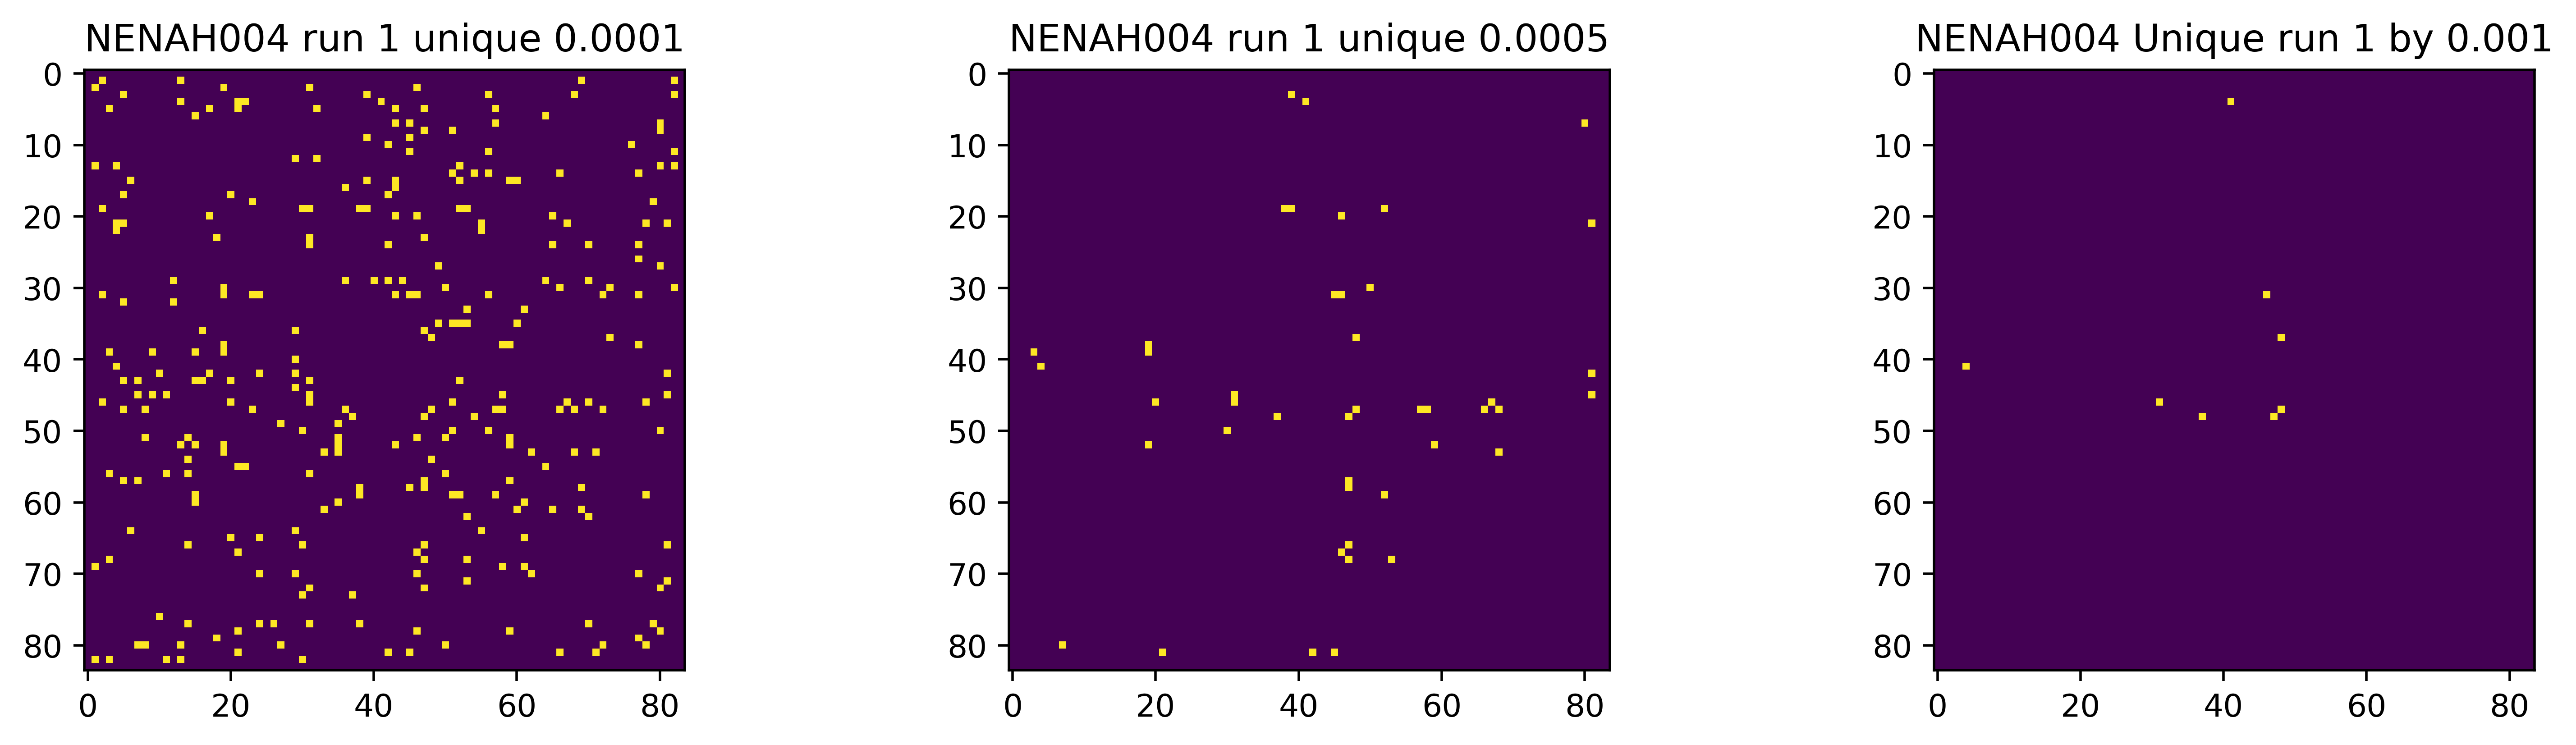

In [65]:
plt.figure(figsize=(15, 12), dpi= 500)

plt.subplot(337)
plt.title("NENAH004 run 1 unique 0.0001")
plt.imshow(comp_dict['NENAH004']['unique_orig_0.0001_bin'])

# plt.yticks(np.arange(0.5, 84, 1), df.index)
# plt.xticks(np.arange(0.5, 84, 1), df.columns)

plt.subplot(338)
plt.title("NENAH004 run 1 unique 0.0005")
plt.imshow(comp_dict['NENAH004']['unique_orig_0.0005_bin'])
# plt.yticks(np.arange(0.5, 84, 1), df.index)
# plt.xticks(np.arange(0.5, 84, 1), df.columns)


plt.subplot(339)
plt.title("NENAH004 Unique run 1 by 0.001" )
plt.imshow(comp_dict['NENAH004']['unique_orig_0.001_bin'])

plt.show()

In [79]:
print(list(comp_dict['NENAH004'].keys())[0:35])
thresholds = [0.05, 0.02, 0.01, 0.005, 0.001, 0.0005, 0.0001]

['orig_data', 'run2_data', 'bin_diff', 'edges_different', 'orig_edges', 'run2_edges', 'average_edges', 'percentage_edge_diff', 'res_orig_df', 'res_orig_bin_df', 'res_run2_df', 'res_run2_bin_df', 'orig_unique_edges', 'run2_unique_edges', 'orig_unique_edges_pct', 'run2_unique_edges_pct', 'orig_unique_node_strength', 'orig_unique_node_strength_pct', 'run2_unique_node_strength', 'run2_unique_node_strength_pct', 'orig_unique_tot_strength', 'orig_unique_tot_strength_pct', 'run2_unique_tot_strength', 'run2_unique_tot_strength_pct', 'unique_orig_0.05_bin', 'unique_orig_0.05', 'unique_run2_0.05_bin', 'unique_run2_0.05', 'no_edges_unique_orig_0.05', 'no_edges_unique_run2_0.05', 'percentage_unique_orig_0.05', 'percentage_unique_run2_0.05', 'diff_by_0.05', 'unique_orig_0.02_bin', 'unique_orig_0.02']


In [81]:
print(comp_dict['NENAH004']['diff_by_0.02'].sum().sum())

2


In [60]:
comp_dict['NENAH004']['run2_data'].sum().sum()

76.20024784400799